# 基于卷积神经网络的手写英文字母识别系统研究

## 准备数据集及数据预处理

### 将下载的数据集按类重命名

In [53]:

from torchvision.datasets import EMNIST  
from PIL import Image  
import os  
from IPython.display import display  

def save_emnist_images_with_class_previews(save_dir="emnist_png_balanced", max_images_per_class=1000, preview=True, preview_limit_per_class=10):  
    digits = [str(i) for i in range(10)]  
    letters = [  
        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',  
        'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',  
        'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't'  
    ]  
    all_labels = digits + letters  

    # 修改后的函数，区分大小写文件夹名  
    def label_char_to_folder_name(label_char):  
        if label_char.islower():  
            return label_char + "_"   # 小写加下划线后缀  
        else:  
            return label_char         # 大写和数字保持不变  

    def label_to_char(label):  
        if 0 <= label < len(all_labels):  
            return all_labels[label]  
        else:  
            return "UNK"  

    # 先处理预览部分：读取时用转换后的文件夹名  
    if os.path.exists(save_dir) and os.path.isdir(save_dir):  
        print(f"检测到目录 {save_dir} 已存在，跳过下载，直接展示预览图...")  
        class_preview_images = {}  
        for label_char in all_labels:  
            folder_name = label_char_to_folder_name(label_char)  
            label_dir = os.path.join(save_dir, folder_name)  
            imgs = []  
            if os.path.exists(label_dir) and os.path.isdir(label_dir):  
                files = sorted(os.listdir(label_dir))  
                for f in files[:preview_limit_per_class]:  
                    try:  
                        im = Image.open(os.path.join(label_dir, f)).convert('L')  
                        imgs.append(im)  
                    except:  
                        pass  
            if imgs:  
                class_preview_images[label_char] = imgs  
        if preview:  
            for label_char, imgs in class_preview_images.items():  
                width = 28 * len(imgs)  
                height = 28  
                big_img = Image.new('L', (width, height))  
                for idx, im in enumerate(imgs):  
                    big_img.paste(im, (28*idx, 0))  
                print(f"类别 {label_char} 预览图 (共 {len(imgs)} 张):")  
                display(big_img)  

        print("预览完毕。")  
        return  

    # 下载并保存图像  
    print(f"目录 {save_dir} 不存在，开始下载数据并保存...")  
    train_set = EMNIST(root="emnist_data", split="balanced", train=True, download=True)  
    test_set = EMNIST(root="emnist_data", split="balanced", train=False, download=True)  
    full_dataset = train_set + test_set  

    os.makedirs(save_dir, exist_ok=True)  

    images_per_class = {label_char: 0 for label_char in all_labels}  
    saved_images_count = 0  

    class_preview_images = {label_char: [] for label_char in all_labels} if preview else None  

    for i, (img, label) in enumerate(full_dataset):  
        label_char = label_to_char(label)  
        if label_char == "UNK":  
            continue  
        if images_per_class[label_char] >= max_images_per_class:  
            continue  

        folder_name = label_char_to_folder_name(label_char)  
        label_dir = os.path.join(save_dir, folder_name)  
        os.makedirs(label_dir, exist_ok=True)  

        img = img.resize((28, 28))  
        img = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT).rotate(90)  
        img.save(os.path.join(label_dir, f"{images_per_class[label_char]}.png"))  

        if preview and len(class_preview_images[label_char]) < preview_limit_per_class:  
            class_preview_images[label_char].append(img)  

        images_per_class[label_char] += 1  
        saved_images_count += 1  

        if saved_images_count % 500 == 0:  
            print(f"已保存 {saved_images_count} 张图像...")  

    print("所有图像已保存到", save_dir)  

    if preview:  
        for label_char, imgs in class_preview_images.items():  
            if len(imgs) == 0:  
                continue  
            width = 28 * len(imgs)  
            height = 28  
            big_img = Image.new('L', (width, height))  
            for idx, im in enumerate(imgs):  
                big_img.paste(im, (28*idx, 0))  
            print(f"类别 {label_char} 预览图 (共 {len(imgs)} 张):")  
            display(big_img)  

# 调用（Notebook中执行）  
save_emnist_images_with_class_previews(save_dir="emnist_png_balanced", max_images_per_class=1000, preview=True, preview_limit_per_class=10)  



检测到目录 emnist_png_balanced 已存在，跳过下载，直接展示预览图...
类别 0 预览图 (共 10 张):


类别 1 预览图 (共 10 张):


类别 2 预览图 (共 10 张):


类别 3 预览图 (共 10 张):


类别 4 预览图 (共 10 张):


类别 5 预览图 (共 10 张):


类别 6 预览图 (共 10 张):


类别 7 预览图 (共 10 张):


类别 8 预览图 (共 10 张):


类别 9 预览图 (共 10 张):


类别 A 预览图 (共 10 张):


类别 B 预览图 (共 10 张):


类别 C 预览图 (共 10 张):


类别 D 预览图 (共 10 张):


类别 E 预览图 (共 10 张):


类别 F 预览图 (共 10 张):


类别 G 预览图 (共 10 张):


类别 H 预览图 (共 10 张):


类别 I 预览图 (共 10 张):


类别 J 预览图 (共 10 张):


类别 K 预览图 (共 10 张):


类别 L 预览图 (共 10 张):


类别 M 预览图 (共 10 张):


类别 N 预览图 (共 10 张):


类别 O 预览图 (共 10 张):


类别 P 预览图 (共 10 张):


类别 Q 预览图 (共 10 张):


类别 R 预览图 (共 10 张):


类别 S 预览图 (共 10 张):


类别 T 预览图 (共 10 张):


类别 U 预览图 (共 10 张):


类别 V 预览图 (共 10 张):


类别 W 预览图 (共 10 张):


类别 X 预览图 (共 10 张):


类别 Y 预览图 (共 10 张):


类别 Z 预览图 (共 10 张):


类别 a 预览图 (共 10 张):


类别 b 预览图 (共 10 张):


类别 d 预览图 (共 10 张):


类别 e 预览图 (共 10 张):


类别 f 预览图 (共 10 张):


类别 g 预览图 (共 10 张):


类别 h 预览图 (共 10 张):


类别 n 预览图 (共 10 张):


类别 q 预览图 (共 10 张):


类别 r 预览图 (共 10 张):


类别 t 预览图 (共 10 张):


预览完毕。


### 转白底黑字

In [54]:
# import os  
# from PIL import Image  
# import numpy as np  
# 
# def invert_image_colors_inplace(image_path):  
#     """原地反转图片颜色：黑底白字 <-> 白底黑字"""  
#     image = Image.open(image_path).convert("RGB")  
#     img_array = np.array(image)  
#     inverted_array = 255 - img_array  
#     inverted_image = Image.fromarray(inverted_array)  
#     inverted_image.save(image_path)  
#     print(f"Inverted and overwritten: {image_path}")  
# 
# def process_folder_recursive_inplace(root_folder):  
#     for root, dirs, files in os.walk(root_folder):  
#         for file in files:  
#             if not file.lower().endswith(('.png', '.jpg', '.jpeg')):  
#                 continue  
# 
#             file_name_without_ext = os.path.splitext(file)[0]  
# 
#             # 判断图片名是否为纯数字，是则反转颜色  
#             if file_name_without_ext.isdigit():  
#                 img_path = os.path.join(root, file)  
#                 invert_image_colors_inplace(img_path)  
# 
#             # 如果图片名以 "img" 开头 (忽略大小写)，则跳过处理，保持原样  
#             elif file_name_without_ext.lower().startswith("img"):  
#                 # 不做处理，跳过  
#                 print(f"Skipped (img prefix): {os.path.join(root, file)}")  
#                 continue  
# 
#             else:  
#                 # 其他图片，根据需求这里先跳过，或者也可以反转  
#                 print(f"Skipped (other): {os.path.join(root, file)}")  
#                 continue  
# 
# if __name__ == "__main__":  
#     img_root_folder = r"emnist_png_balanced"  
#     process_folder_recursive_inplace(img_root_folder)  

### 划分训练集和测试集

In [55]:
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision import utils
import torchvision.transforms as T
import torch.utils.data as Data
from PIL import Image
import numpy as np
import torch.optim as optim
import os
import sys
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
from torch.utils.data import Subset
#使用tensorboardX进行可视化
from tensorboardX import SummaryWriter
from torchvision import datasets
from torch.utils.data import random_split, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
#数据增强
from albumentations.pytorch import ToTensorV2
from torchvision.transforms.autoaugment import AutoAugmentPolicy #自动数据增强库
import albumentations as A
#参数定义
EPOCH = 500
BATCH_SIZE = 128
LR = 1e-4
ROOT_DIR = "emnist_png_balanced"
LOG_DIR = f"runs/handwriting_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
MODEL_SAVE_PATH = "cnn_res_attention_best.pth"

In [56]:
# 数据增强模块
# transform = T.Compose([
#     T.Resize((28, 28)), # 统一尺寸为28x28
#     T.Grayscale(num_output_channels=1), # 灰度处理
#     T.RandomRotation(15),  # 数据增强：随机旋转
#     T.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 位移
#     T.ToTensor(), # 转换为Tensor
#     # 如果需要标准化，可以取消注释以下行
#     T.Normalize([0.5], [0.5])
# ])

# 存在图片过度偏移问题。
# class DataAutoAugment:
#     def __init__(self):
#         self.transform = T.Compose([
#             T.Resize((28, 28)),
#             T.Grayscale(num_output_channels=1),
#             T.AutoAugment(policy=AutoAugmentPolicy.SVHN),
#             T.ToTensor(),
#             T.Normalize(mean=(0.5,), std=(0.5,))
#         ])
#
#     def __call__(self, img):
#         return self.transform(img)

class AlbumentationsTransform:
    def __init__(self):
        self.transform=A.Compose([
            A.Resize(28, 28),
            A.Rotate(limit=15, p=0.5),
            A.Affine(translate_percent=(0.1,0.1),p=0.5),
            A.RandomBrightnessContrast(p=0.3),
            A.Normalize(mean=(0.5,),std=(0.5,)),
            ToTensorV2()
        ])
    def __call__(self, img):
        img=np.array(img.convert('L'))
        return self.transform(image=img)['image']


transform=AlbumentationsTransform()

In [57]:

def split_dataset(root_dir, transform, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, batch_size=128, shuffle=True, random_seed=42): 
    
    """
    划分数据集为训练集、验证集和测试集，并返回对应的DataLoader。

    参数:
    - root_dir: 数据集根目录
    - transform: 数据预处理变换
    - train_ratio: 训练集比例
    - val_ratio: 验证集比例
    - test_ratio: 测试集比例
    - batch_size: 批次大小
    - shuffle: 是否打乱数据
    - random_seed: 随机种子，用于保证结果可重复

    返回:
    - train_loader: 训练集DataLoader
    - val_loader: 验证集DataLoader
    - test_loader: 测试集DataLoader
    - full_dataset: 原始的ImageFolder数据集
    """
    # 确保比例之和为1
    assert train_ratio + val_ratio + test_ratio == 1, "比例之和必须为1"  

    full_dataset = datasets.ImageFolder(root=root_dir, transform=transform)  
    targets = full_dataset.targets  
    
    class_indices = {}  
    for idx, label in enumerate(targets):  
        class_indices.setdefault(label, []).append(idx)  
    
    train_indices = []  
    val_indices = []  
    test_indices = []  
    
    generator = torch.Generator().manual_seed(random_seed)  
    
    for label, indices in class_indices.items():  
        indices = torch.tensor(indices)  
        indices = indices[torch.randperm(len(indices), generator=generator)]  
        
        n_total = len(indices)  
        n_train = int(train_ratio * n_total)  
        n_val = int(val_ratio * n_total)  
        n_test = n_total - n_train - n_val  
        
        train_indices.extend(indices[:n_train].tolist())  
        val_indices.extend(indices[n_train:n_train+n_val].tolist())  
        test_indices.extend(indices[n_train+n_val:].tolist())  
    
    train_subset = Subset(full_dataset, train_indices)  
    val_subset = Subset(full_dataset, val_indices)  
    test_subset = Subset(full_dataset, test_indices)  
    
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=shuffle)  
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)  
    test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)  

    # 统计每个类别数量的函数  
    def count_classes(indices, targets):  
        label_counts = Counter()  
        for idx in indices:  
            label_counts[targets[idx]] += 1  
        return label_counts  

    # 打印每个类别样本数  
    train_counts = count_classes(train_indices, targets)  
    val_counts = count_classes(val_indices, targets)  
    test_counts = count_classes(test_indices, targets)  
    
    classes = full_dataset.classes  # 类别名称列表  
    
    print("训练集每个类别样本数：")  
    for label_idx, count in sorted(train_counts.items()):  
        print(f"类别 {classes[label_idx]}: {count}")  
        
    print("\n验证集每个类别样本数：")  
    for label_idx, count in sorted(val_counts.items()):  
        print(f"类别 {classes[label_idx]}: {count}")  
        
    print("\n测试集每个类别样本数：")  
    for label_idx, count in sorted(test_counts.items()):  
        print(f"类别 {classes[label_idx]}: {count}")  

    return train_loader, val_loader, test_loader, full_dataset 


训练集每个类别样本数：
类别 0: 700
类别 1: 700
类别 2: 700
类别 3: 700
类别 4: 700
类别 5: 700
类别 6: 700
类别 7: 700
类别 8: 700
类别 9: 700
类别 A: 700
类别 B: 700
类别 C: 700
类别 D: 700
类别 E: 700
类别 F: 700
类别 G: 700
类别 H: 700
类别 I: 700
类别 J: 700
类别 K: 700
类别 L: 700
类别 M: 700
类别 N: 700
类别 O: 700
类别 P: 700
类别 Q: 700
类别 R: 700
类别 S: 700
类别 T: 700
类别 U: 700
类别 V: 700
类别 W: 700
类别 X: 700
类别 Y: 700
类别 Z: 700
类别 a_: 700
类别 b_: 700
类别 d_: 700
类别 e_: 700
类别 f_: 700
类别 g_: 700
类别 h_: 700
类别 n_: 700
类别 q_: 700
类别 r_: 700
类别 t_: 700

验证集每个类别样本数：
类别 0: 150
类别 1: 150
类别 2: 150
类别 3: 150
类别 4: 150
类别 5: 150
类别 6: 150
类别 7: 150
类别 8: 150
类别 9: 150
类别 A: 150
类别 B: 150
类别 C: 150
类别 D: 150
类别 E: 150
类别 F: 150
类别 G: 150
类别 H: 150
类别 I: 150
类别 J: 150
类别 K: 150
类别 L: 150
类别 M: 150
类别 N: 150
类别 O: 150
类别 P: 150
类别 Q: 150
类别 R: 150
类别 S: 150
类别 T: 150
类别 U: 150
类别 V: 150
类别 W: 150
类别 X: 150
类别 Y: 150
类别 Z: 150
类别 a_: 150
类别 b_: 150
类别 d_: 150
类别 e_: 150
类别 f_: 150
类别 g_: 150
类别 h_: 150
类别 n_: 150
类别 q_: 150
类别 r_: 150
类别 t_: 150

测试集每个类别样本数：


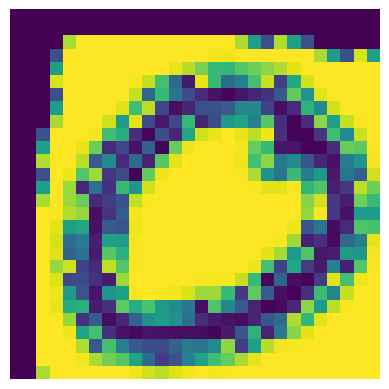

CNN(
  (Conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Linear): Sequential(
    (0): Linear(in_features=1568, out_features=400, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=400, out_features=80, bias=True)
    (4): ReLU()
    (5): Linear(in_features=80, out_features=47, bias=True)
  )
)


In [58]:
# 使用函数划分数据集
train_loader, val_loader, test_loader, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)

# 数据可视化
to_img = T.ToPILImage()
a = to_img(train_loader.dataset[0][0])  # size=[1, 32, 32]
plt.imshow(a)
plt.axis('off')
plt.show()


# 定义CNN模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.Conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.Conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.Dropout(p=0.2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.Linear = nn.Sequential(
            nn.Linear(32*7*7, 400),
            nn.Dropout(p=0.2),
            nn.ReLU(),
            nn.Linear(400, 80),
            nn.ReLU(),
            nn.Linear(80, label_num),
        )

    def forward(self, input):
        input = self.Conv1(input)
        input = self.Conv2(input)
        input = input.view(input.size(0), -1)
        output = self.Linear(input)
        return output

cnn = CNN()
print(cnn)

# 定义优化器
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
# 定义损失函数
loss_func = nn.CrossEntropyLoss()

In [59]:
# 轻量CNN结构？
class SimpleAttention(nn.Module):
    def __init__(self, channel, reduction=16):
        super().__init__()
        # Squeeze操作：全局平均池化
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        # Excitation操作：两个全连接层
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()  # 输入形状 [B, C, H, W]
        # Squeeze
        y = self.avg_pool(x).view(b, c)  # [B, C]
        # Excitation
        y = self.fc(y).view(b, c, 1, 1)  # [B, C, 1, 1]
        # Reweight
        return x * y.expand_as(x)  # 广播乘法 [B, C, H, W]


In [60]:
# 自注意力模块
class SelfAttention2D(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.query = nn.Conv2d(in_channels, in_channels // 8, kernel_size=1)
        self.key   = nn.Conv2d(in_channels, in_channels // 8, kernel_size=1)
        self.value = nn.Conv2d(in_channels, in_channels, kernel_size=1)
        self.gamma = nn.Parameter(torch.zeros(1))  # 可学习的缩放系数

    def forward(self, x):
        B, C, H, W = x.shape
        proj_q = self.query(x).view(B, -1, H * W)          # B x C1 x N
        proj_k = self.key(x).view(B, -1, H * W)            # B x C1 x N
        proj_v = self.value(x).view(B, -1, H * W)          # B x C  x N

        attention = torch.bmm(proj_q.permute(0, 2, 1), proj_k)  # B x N x N
        attention = torch.softmax(attention, dim=-1)

        out = torch.bmm(proj_v, attention.permute(0, 2, 1))     # B x C x N
        out = out.view(B, C, H, W)

        return self.gamma * out + x

# class CBAM(nn.Module):
#     def __init__(self, channels, reduction=16, kernel_size=7):
#         super().__init__()
#         # 通道注意力
#         self.channel_att = nn.Sequential(
#             nn.AdaptiveAvgPool2d(1),
#             nn.Conv2d(channels, channels // reduction, 1, bias=False),
#             nn.ReLU(),
#             nn.Conv2d(channels // reduction, channels, 1, bias=False),
#             nn.Sigmoid()
#         )
#         # 空间注意力
#         self.spatial_att = nn.Sequential(
#             nn.Conv2d(2, 1, kernel_size, padding=kernel_size // 2, bias=False),
#             nn.Sigmoid()
#         )
#
#     def forward(self, x):
#         # 通道注意力
#         ca = self.channel_att(x)
#         x = x * ca
#
#         # 空间注意力
#         max_pool = torch.max(x, dim=1, keepdim=True)[0]
#         avg_pool = torch.mean(x, dim=1, keepdim=True)
#         sa_input = torch.cat([avg_pool, max_pool], dim=1)
#         sa = self.spatial_att(sa_input)
#         x = x * sa
#
#         return x


In [61]:
# 添加残差模块
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, use_attention=False):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // 2, 1, padding=0),
            nn.BatchNorm2d(in_channels // 2),
            nn.ReLU(),
            nn.Conv2d(in_channels // 2, in_channels // 2, 3, padding=1),
            nn.BatchNorm2d(in_channels // 2),
            nn.ReLU(),
            nn.Conv2d(in_channels // 2, out_channels, 1, padding=0),
            nn.BatchNorm2d(out_channels)
        )
        #调用注意力机制
        self.attn = SimpleAttention(out_channels) if use_attention else nn.Identity()
        # self.attn = CBAM(out_channels) if use_attention else nn.Identity()

        self.shortcut = nn.Sequential()
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1),
                nn.BatchNorm2d(out_channels)
            )

        self.relu = nn.ReLU()

    def forward(self, x):
        res = self.shortcut(x)
        out = self.conv(x)
        out = self.attn(out)
        return self.relu(out + res)

In [62]:
# 加入倒残差模块
class InvertedResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, expansion_ratio=6, stride=1, use_attention=False):
        super().__init__()
        hidden_dim = in_channels * expansion_ratio
        self.use_res_connect = (stride == 1 and in_channels == out_channels)

        self.block = nn.Sequential(
            nn.Conv2d(in_channels, hidden_dim, kernel_size=1, bias=False),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU6(inplace=True),
            nn.Conv2d(hidden_dim, hidden_dim, kernel_size=3, stride=stride, padding=1, groups=hidden_dim, bias=False),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU6(inplace=True),
            nn.Conv2d(hidden_dim, out_channels, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels),
        )
        # 调用注意力模块
        # self.attn = CBAM(out_channels) if use_attention else nn.Identity()
        self.attn = SimpleAttention(out_channels) if use_attention else nn.Identity()

    def forward(self, x):
        out = self.block(x)
        out = self.attn(out)
        if self.use_res_connect:
            return x + out
        else:
            return out


In [63]:
# CNN与注意力模块的结合
class CNNWithAttention(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)  # → 16x16
        )

        # 增加额外卷积层 (2层)
        # self.pre_extra = nn.Sequential(
        #     nn.Conv2d(32, 32, 3, padding=1),
        #     nn.BatchNorm2d(32),
        #     nn.ReLU(),
        #     nn.Conv2d(32, 32, 3, padding=1),
        #     nn.BatchNorm2d(32),
        #     nn.ReLU(),
        # )

        self.extra_conv = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.block1 = ResidualBlock(64, 64, use_attention=True)
        self.inverted_block = InvertedResidualBlock(64, 64, expansion_ratio=6, use_attention=True)  # 倒残差模块
        self.pool2 = nn.MaxPool2d(2)  # 14x14 → 7x7

        self.attention = SelfAttention2D(64) # 添加自注意力模块

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Dropout(0.3),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.stem(x)
        x = self.extra_conv(x)  # 额外卷积层
        x = self.block1(x)
        x = self.inverted_block(x)  # 倒残差模块
        x = self.pool2(x)
        x = self.attention(x)
        return self.classifier(x)


In [64]:
# 训练与验证函数
def train_and_validate(model, train_loader, val_loader, epochs, device='cpu',
                       save_path='resnet18_best_model.pth', save_best_only=True, patience=15):
    model = model.to(device)

    # ✅ 打印模型参数所在设备信息
    print("📦 模型参数设备分布：")
    for name, param in model.named_parameters():
        print(f"{name} → {param.device}, shape={param.shape}")

    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_func = nn.CrossEntropyLoss()
    writer = SummaryWriter(log_dir=LOG_DIR)
    
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

    best_val_top1_acc = 0.0
    no_improve_count = 0

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        top1_correct = 0
        top3_correct = 0
        total = 0

        # --- 训练阶段 ---
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            outputs = model(batch_x)
            loss = loss_func(outputs, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * batch_x.size(0)

            # Top-1
            _, top1_pred = torch.max(outputs, 1)
            top1_correct += (top1_pred == batch_y).sum().item()

            # Top-3
            _, top3_pred_indices = torch.topk(outputs, 3, dim=1)
            top3_correct += torch.sum(top3_pred_indices == batch_y.view(-1, 1).expand_as(top3_pred_indices)).item()

            total += batch_y.size(0)

        avg_loss = total_loss / total
        train_top1_acc = top1_correct / total
        train_top3_acc = top3_correct / total

        # --- 验证阶段 ---
        model.eval()
        val_top1_correct = 0
        val_top3_correct = 0
        val_total = 0
        val_loss = 0.0

        with torch.no_grad():
            for val_x, val_y in val_loader:
                val_x, val_y = val_x.to(device), val_y.to(device)
                val_outputs = model(val_x)
                val_loss += loss_func(val_outputs, val_y).item() * val_x.size(0)

                # Top-1
                _, val_top1_pred = torch.max(val_outputs, 1)
                val_top1_correct += (val_top1_pred == val_y).sum().item()

                # Top-3
                _, val_top3_pred_indices = torch.topk(val_outputs, 3, dim=1)
                val_top3_correct += torch.sum(val_top3_pred_indices == val_y.view(-1, 1).expand_as(val_top3_pred_indices)).item()

                val_total += val_y.size(0)

        avg_val_loss = val_loss / val_total
        val_top1_acc = val_top1_correct / val_total
        val_top3_acc = val_top3_correct / val_total
        
        scheduler.step(val_top1_acc)

        # --- TensorBoard日志记录 ---
        writer.add_scalar("Loss/train", avg_loss, epoch)
        writer.add_scalar("Accuracy/train_top1", train_top1_acc, epoch)
        writer.add_scalar("Accuracy/train_top3", train_top3_acc, epoch)
        writer.add_scalar("Loss/val", avg_val_loss, epoch)
        writer.add_scalar("Accuracy/val_top1", val_top1_acc, epoch)
        writer.add_scalar("Accuracy/val_top3", val_top3_acc, epoch)

        # --- 控制台输出 ---
        print(f"Epoch [{epoch+1}/{epochs}] Loss: {avg_loss:.4f}, "
              f"Train Top-1 Acc: {train_top1_acc:.4f}, Train Top-3 Acc: {train_top3_acc:.4f}, "
              f"Val Top-1 Acc: {val_top1_acc:.4f}, Val Top-3 Acc: {val_top3_acc:.4f}")

        # --- 保存最佳模型 ---
        if val_top1_acc > best_val_top1_acc:
            best_val_top1_acc = val_top1_acc
            no_improve_count = 0
            if save_best_only:
                torch.save(model.state_dict(), save_path)
                print(f"✅ 新的最佳模型已保存，Val Top-1 Acc: {val_top1_acc:.4f}")
        else:
            no_improve_count += 1

        # --- Early Stopping ---
        if no_improve_count >= patience:
            print(f"⏳ 验证集Top-1准确率在连续 {patience} 轮未提升，训练提前终止。")
            break

        sys.stdout.flush()

    writer.close()

In [65]:
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"当前使用设备: {device}")

    train_loader, val_loader, test_loader, full_dataset = split_dataset(
        root_dir=ROOT_DIR,
        transform=transform,
        train_ratio=0.7,
        val_ratio=0.15,
        test_ratio=0.15,
        batch_size=BATCH_SIZE,
        shuffle=True,
        random_seed=42
    )

    print(f"训练集大小: {len(train_loader.dataset)}")
    print(f"验证集大小: {len(val_loader.dataset)}")
    print(f"测试集大小: {len(test_loader.dataset)}")

    label_num = len(full_dataset.class_to_idx)
    model = CNNWithAttention(label_num) # 调用模型

    train_and_validate(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        epochs=EPOCH,
        device=device,
        save_path=MODEL_SAVE_PATH
    )

    print("训练结束。")

if __name__ == "__main__":
    main()

当前使用设备: cuda
训练集每个类别样本数：
类别 0: 700
类别 1: 700
类别 2: 700
类别 3: 700
类别 4: 700
类别 5: 700
类别 6: 700
类别 7: 700
类别 8: 700
类别 9: 700
类别 A: 700
类别 B: 700
类别 C: 700
类别 D: 700
类别 E: 700
类别 F: 700
类别 G: 700
类别 H: 700
类别 I: 700
类别 J: 700
类别 K: 700
类别 L: 700
类别 M: 700
类别 N: 700
类别 O: 700
类别 P: 700
类别 Q: 700
类别 R: 700
类别 S: 700
类别 T: 700
类别 U: 700
类别 V: 700
类别 W: 700
类别 X: 700
类别 Y: 700
类别 Z: 700
类别 a_: 700
类别 b_: 700
类别 d_: 700
类别 e_: 700
类别 f_: 700
类别 g_: 700
类别 h_: 700
类别 n_: 700
类别 q_: 700
类别 r_: 700
类别 t_: 700

验证集每个类别样本数：
类别 0: 150
类别 1: 150
类别 2: 150
类别 3: 150
类别 4: 150
类别 5: 150
类别 6: 150
类别 7: 150
类别 8: 150
类别 9: 150
类别 A: 150
类别 B: 150
类别 C: 150
类别 D: 150
类别 E: 150
类别 F: 150
类别 G: 150
类别 H: 150
类别 I: 150
类别 J: 150
类别 K: 150
类别 L: 150
类别 M: 150
类别 N: 150
类别 O: 150
类别 P: 150
类别 Q: 150
类别 R: 150
类别 S: 150
类别 T: 150
类别 U: 150
类别 V: 150
类别 W: 150
类别 X: 150
类别 Y: 150
类别 Z: 150
类别 a_: 150
类别 b_: 150
类别 d_: 150
类别 e_: 150
类别 f_: 150
类别 g_: 150
类别 h_: 150
类别 n_: 150
类别 q_: 150
类别 r_: 150
类别 t_: 150


D:\condaenv\.conda\envs\Compy12\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/500] Loss: 3.8444, Train Top-1 Acc: 0.0303, Train Top-3 Acc: 0.0865, Val Top-1 Acc: 0.0774, Val Top-3 Acc: 0.1671
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.0774
Epoch [2/500] Loss: 3.6893, Train Top-1 Acc: 0.0663, Train Top-3 Acc: 0.1633, Val Top-1 Acc: 0.1095, Val Top-3 Acc: 0.2841
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.1095
Epoch [3/500] Loss: 3.2861, Train Top-1 Acc: 0.1110, Train Top-3 Acc: 0.2864, Val Top-1 Acc: 0.2018, Val Top-3 Acc: 0.4244
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.2018
Epoch [4/500] Loss: 2.8867, Train Top-1 Acc: 0.1620, Train Top-3 Acc: 0.3912, Val Top-1 Acc: 0.2542, Val Top-3 Acc: 0.5201
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.2542
Epoch [5/500] Loss: 2.6094, Train Top-1 Acc: 0.2155, Train Top-3 Acc: 0.4834, Val Top-1 Acc: 0.2831, Val Top-3 Acc: 0.5596
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.2831
Epoch [6/500] Loss: 2.3815, Train Top-1 Acc: 0.2676, Train Top-3 Acc: 0.5614, Val Top-1 Acc: 0.4170, Val Top-3 Acc: 0.7021
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.4170
Epoch [7/500] Loss: 2.1903, Train Top-1 Acc: 0.3158, Train